In [1]:
pip install sinlingua

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━

In [1]:
import pandas as pd
#from gensim.parsing.preprocessing import remove_stopwords
import re
import joblib
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sinlingua.preprocessor.stopword_remover import StopWordRemover
from sinlingua.preprocessor.tokenizer import SinhalaTokenizer
from sinlingua.preprocessor.stemmer import SinhalaStemmer
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/research/Data

/content/drive/My Drive/research/Data


In [4]:
df = pd.read_csv('sinhala_df_new.csv')

In [5]:
df.head()

,comment_id,video_id,video_title,text,timestamp,author,author_email,reply_to,Label,Domain,About
0,Ugzz230zOT68yh9cMSV4AaABAg,MvgHDsI8vus,"නොලැබීමට පරල වූ සෞඛ්‍ය වෘත්තීය සමිති... ""ඒ කා...","ඉල්ලුමට සැපයුම අනුව පඩි හැදෙන්නෙ, නැතුව ත්‍රස්...",2024-03-28T07:52:38Z,@haZhPlays,UCSVBF5uqWvrNCUoiSXMzf-w,NaN,Negative,Non,NaN
1,UgwEHhr8hjSq8nvra6V4AaABAg,iwt5Za4hlhM,හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි... ජාතික ...,ඊලග තයිපෝන්ගල් උත්සවය උපරිමයෙන් සාර්ථක ...,2024-01-15T08:04:18Z,@RupachandraAmarasinghe,UCWcb9Y8Cf_2WuRdSFJHuilg,NaN,Positive,Political,Sajith
2,Ugy-XSwfOelLPdHcmSx4AaABAg,iwt5Za4hlhM,හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි... ජාතික ...,තයිපෝන්ගල් උත්සවය සාර්ථක වේවා sjb නායක තුමා...,2024-01-15T08:03:25Z,@RupachandraAmarasinghe,UCWcb9Y8Cf_2WuRdSFJHuilg,NaN,Positive,Political,Sajith
3,UgyqiqIsvqzNF44z3Rl4AaABAg,mX8CN8OeZg4,උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...,මේ රටේ මහා සංඝරත්නයට සමගියෙන් ඉන්න බැරි උනාම ඔ...,2024-01-16T17:45:57Z,@saroth.r7017,UCEHMFn3FOppO2N5zud9lEQA,NaN,Neutral,Non,NaN
4,UgwwnIc2BScNpr8A6Mp4AaABAg,mX8CN8OeZg4,උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...,ඔක්කොටම කලින් මහනායක හාමුදුරුවෝ තම තමන්ගේ ගම් ...,2024-01-15T08:52:32Z,@chagedara3045,UCb3kyne0li9Y1bEzJeZfvcQ,NaN,Negative,Non,NaN


In [6]:
df.Domain.value_counts()

,Domain
P,1793
non,1475
Political,973
p,818
Non,506
Politician,28
political,16
Non-Political,7
Government,2
P,1


In [7]:
df['Domain'] = df['Domain'].replace(['P', 'p','Political','Politician','political','Government','rajapaksha',' P'], 'political')
df['Domain'] = df['Domain'].replace(['non','Non','Non ','non ','Non-Political',' non'],'non')

In [8]:
df.Domain.value_counts()

,Domain
political,3631
non,1990


# Combine Title and Text columns

In [9]:
df['Combined'] = df['video_title'] + '.' + df['text']


# Remove Emoticons

In [10]:
import re

def remove_emoji(string):
    if isinstance(string, str): # Check if the input is a string
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string)
    else:
        return string # Return the original value if it's not a string

df['Combined'] = df['Combined'].apply(remove_emoji)

# Remove URLs

In [11]:
import re

def remove_urls(text):
    if isinstance(text, str): # Check if the input is a string
        return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    else:
        return text # Return the original value if it's not a string

# Apply the function to the text column
df['Combined'] = df['Combined'].apply(remove_urls)

# Data Cleaning

In [12]:
def clean_data(text):
    if isinstance(text, str): # Check if the input is a string
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) # Remove URLs

        text = re.sub(r'<.*?>', '', text)     # Remove HTML tags

        text = re.sub(r'@\\w+', '', text)  # Remove mentions

        text = re.sub(r'[^\u0D80-\u0DFF\s]', ' ', text) # Remove non-Sinhala characters (punctuation, numbers, etc.)
        return text
    else:
        return "" # Return an empty string if it's not a string

df['Combined'] = df['Combined'].apply(clean_data)

In [13]:
df.head()

,comment_id,video_id,video_title,text,timestamp,author,author_email,reply_to,Label,Domain,About,Combined
0,Ugzz230zOT68yh9cMSV4AaABAg,MvgHDsI8vus,"නොලැබීමට පරල වූ සෞඛ්‍ය වෘත්තීය සමිති... ""ඒ කා...","ඉල්ලුමට සැපයුම අනුව පඩි හැදෙන්නෙ, නැතුව ත්‍රස්...",2024-03-28T07:52:38Z,@haZhPlays,UCSVBF5uqWvrNCUoiSXMzf-w,NaN,Negative,non,NaN,නොලැබීමට පරල වූ සෞඛ් ය වෘත්තීය සමිති ඒ කා...
1,UgwEHhr8hjSq8nvra6V4AaABAg,iwt5Za4hlhM,හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි... ජාතික ...,ඊලග තයිපෝන්ගල් උත්සවය උපරිමයෙන් සාර්ථක ...,2024-01-15T08:04:18Z,@RupachandraAmarasinghe,UCWcb9Y8Cf_2WuRdSFJHuilg,NaN,Positive,political,Sajith,හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි ජාතික ...
2,Ugy-XSwfOelLPdHcmSx4AaABAg,iwt5Za4hlhM,හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි... ජාතික ...,තයිපෝන්ගල් උත්සවය සාර්ථක වේවා sjb නායක තුමා...,2024-01-15T08:03:25Z,@RupachandraAmarasinghe,UCWcb9Y8Cf_2WuRdSFJHuilg,NaN,Positive,political,Sajith,හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි ජාතික ...
3,UgyqiqIsvqzNF44z3Rl4AaABAg,mX8CN8OeZg4,උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...,මේ රටේ මහා සංඝරත්නයට සමගියෙන් ඉන්න බැරි උනාම ඔ...,2024-01-16T17:45:57Z,@saroth.r7017,UCEHMFn3FOppO2N5zud9lEQA,NaN,Neutral,non,NaN,උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...
4,UgwwnIc2BScNpr8A6Mp4AaABAg,mX8CN8OeZg4,උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...,ඔක්කොටම කලින් මහනායක හාමුදුරුවෝ තම තමන්ගේ ගම් ...,2024-01-15T08:52:32Z,@chagedara3045,UCb3kyne0li9Y1bEzJeZfvcQ,NaN,Negative,non,NaN,උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...


In [14]:
df.Domain.value_counts()

,Domain
political,3631
non,1990


In [15]:
df.shape

(12573, 12)

In [16]:
# prompt: remove all the rows where domain is empty using isna()

# Remove rows where 'Domain' is NaN
df = df.dropna(subset=['Domain'])

In [17]:
df.shape

(5621, 12)

In [18]:
df.drop(columns=['video_title','text','Label','About'], axis = 1, inplace=True)

In [19]:
df.head()

,comment_id,video_id,timestamp,author,author_email,reply_to,Domain,Combined
0,Ugzz230zOT68yh9cMSV4AaABAg,MvgHDsI8vus,2024-03-28T07:52:38Z,@haZhPlays,UCSVBF5uqWvrNCUoiSXMzf-w,NaN,non,නොලැබීමට පරල වූ සෞඛ් ය වෘත්තීය සමිති ඒ කා...
1,UgwEHhr8hjSq8nvra6V4AaABAg,iwt5Za4hlhM,2024-01-15T08:04:18Z,@RupachandraAmarasinghe,UCWcb9Y8Cf_2WuRdSFJHuilg,NaN,political,හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි ජාතික ...
2,Ugy-XSwfOelLPdHcmSx4AaABAg,iwt5Za4hlhM,2024-01-15T08:03:25Z,@RupachandraAmarasinghe,UCWcb9Y8Cf_2WuRdSFJHuilg,NaN,political,හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි ජාතික ...
3,UgyqiqIsvqzNF44z3Rl4AaABAg,mX8CN8OeZg4,2024-01-16T17:45:57Z,@saroth.r7017,UCEHMFn3FOppO2N5zud9lEQA,NaN,non,උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...
4,UgwwnIc2BScNpr8A6Mp4AaABAg,mX8CN8OeZg4,2024-01-15T08:52:32Z,@chagedara3045,UCb3kyne0li9Y1bEzJeZfvcQ,NaN,non,උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...


# Remove Stop Words

In [20]:
#stemmer_obj = SinhalaStemmer() # For Stemming
stopword_remover = StopWordRemover() # For removing stopwords


In [21]:
df['cleaned'] = df['Combined'].apply(lambda x: stopword_remover.remove_stop_words(x))


# Stemming

In [22]:
stemmer_obj = SinhalaStemmer()

df['cleaned'] = df['cleaned'].apply(lambda x: stemmer_obj.stemmer(x))


# Random UnderSampling

In [23]:
df_non = df[df['Domain'] == 'non'].sample(n = 1990, random_state = 42)

In [24]:
df_poli = df[df['Domain'] == 'political'].sample(n=1990, random_state =42)

In [25]:
df = pd.concat([df_non, df_poli])

In [26]:
df.Domain.value_counts()

,Domain
non,1990
political,1990


# XGBoost Classifier

In [27]:
df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join(x))  # Join the list of tokens into a single string
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['Domain'])

X = df['cleaned']
y = df['label_encoded']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.20, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:09:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         non       0.84      0.85      0.85       422
   political       0.83      0.82      0.82       374

    accuracy                           0.84       796
   macro avg       0.84      0.84      0.84       796
weighted avg       0.84      0.84      0.84       796



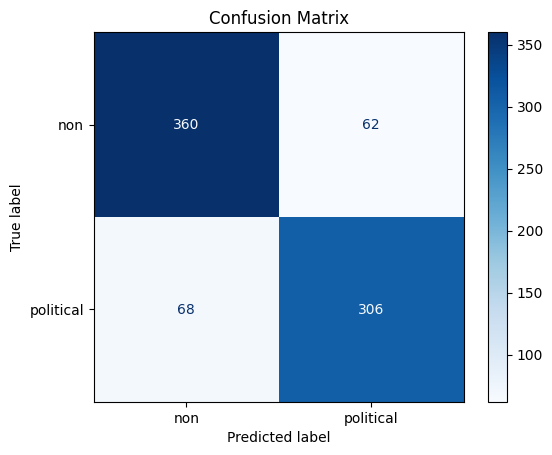

In [28]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

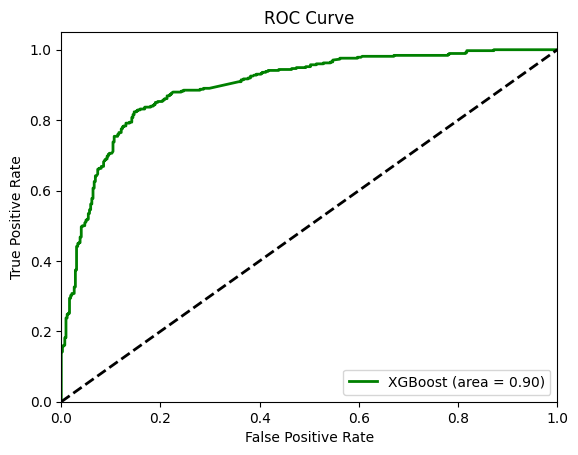

In [29]:
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='green', lw=2, label=f'XGBoost (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# SVM

In [30]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

         non       0.83      0.82      0.83       422
   political       0.80      0.81      0.81       374

    accuracy                           0.82       796
   macro avg       0.82      0.82      0.82       796
weighted avg       0.82      0.82      0.82       796



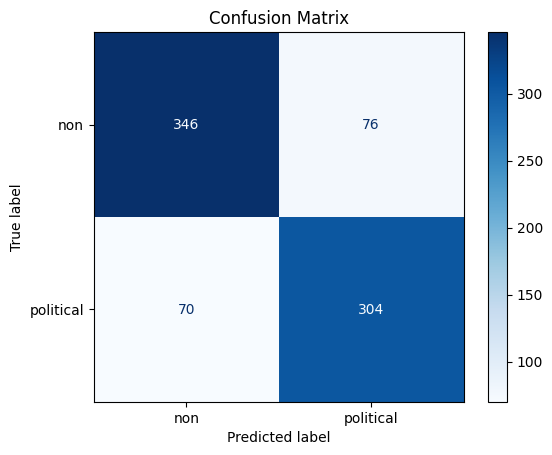

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

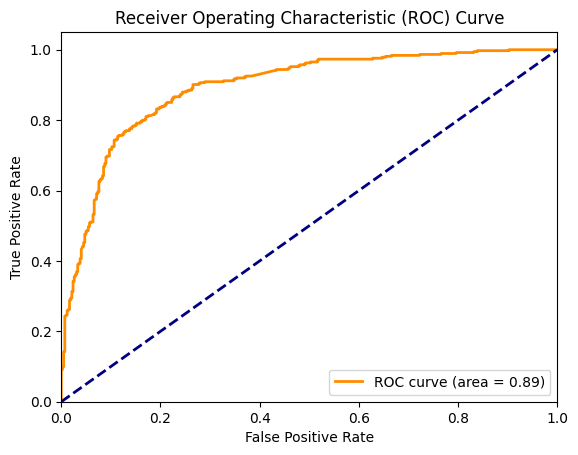

In [32]:
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_2 = auc(fpr2, tpr2)

# Plot ROC curve
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

         non       0.84      0.85      0.84       422
   political       0.82      0.82      0.82       374

    accuracy                           0.83       796
   macro avg       0.83      0.83      0.83       796
weighted avg       0.83      0.83      0.83       796



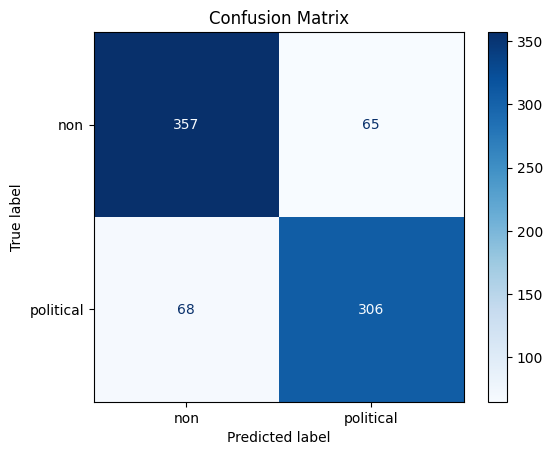

In [34]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

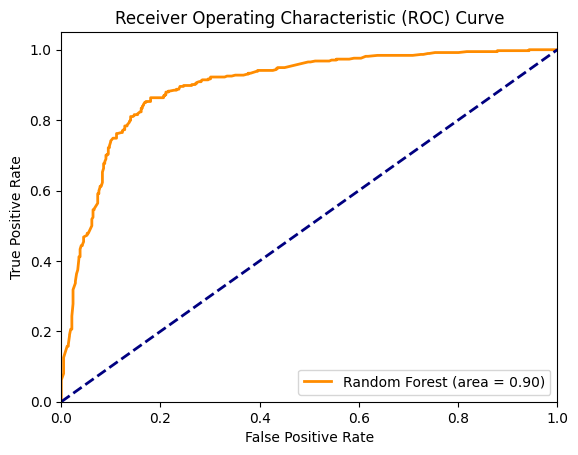

In [35]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_3 = auc(fpr3, tpr3)

# Plot ROC curve
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'Random Forest (area = {roc_auc_3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Save the Random Forest model
joblib.dump(rf_model, 'random_forest2.pkl')

['random_forest2.pkl']

# Naive Bayes

In [37]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       422
           1       0.76      0.86      0.81       374

    accuracy                           0.81       796
   macro avg       0.81      0.81      0.81       796
weighted avg       0.81      0.81      0.81       796

Confusion Matrix:
 [[319 103]
 [ 51 323]]


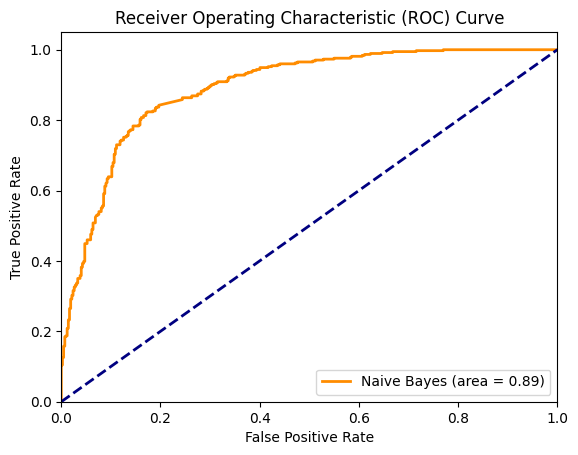

In [38]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_4 = auc(fpr4, tpr4)

# Plot ROC curve
plt.figure()
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label=f'Naive Bayes (area = {roc_auc_4:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# All the graphs in one plot

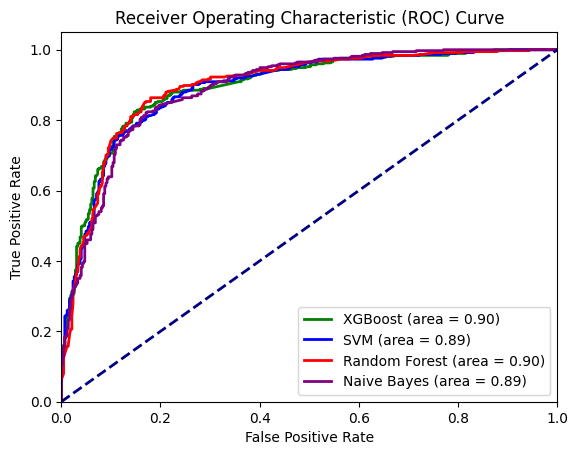

In [39]:

# Plot ROC curve
plt.figure()
plt.plot(fpr1, tpr1, color='green', lw=2, label=f'XGBoost (area = {roc_auc:.2f})')
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'SVM (area = {roc_auc_2:.2f})')
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'Random Forest (area = {roc_auc_3:.2f})')
plt.plot(fpr4, tpr4, color='purple', lw=2, label=f'Naive Bayes (area = {roc_auc_4:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Explainable AI

In [40]:
# prompt: translate dataset into English

from googletrans import Translator

translator = Translator()

def translate_text(text):
  try:
    translation = translator.translate(text, dest='en')
    return translation.text
  except Exception as e:
    print(f"Translation error: {e}")
    return text  # Return original text if translation fails

# Assuming 'df' is your DataFrame and 'cleaned' column contains the text to translate
df['cleaned_english'] = df['cleaned'].apply(translate_text)

print(df.head())

Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON 

In [ ]:
pip install shap


In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3515 (\N{SINHALA LETTER RAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Matplotlib currently does not support Sinhala natively.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3504 (\N{SINHALA LETTER MAHAAPRAANA DAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3490 (\N{SINHALA LETTER ALPAPRAANA JAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3514 (\N{SINHALA LETTER YAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3520 (\N{SINHALA LETTER VAYANNA}) missing from current 

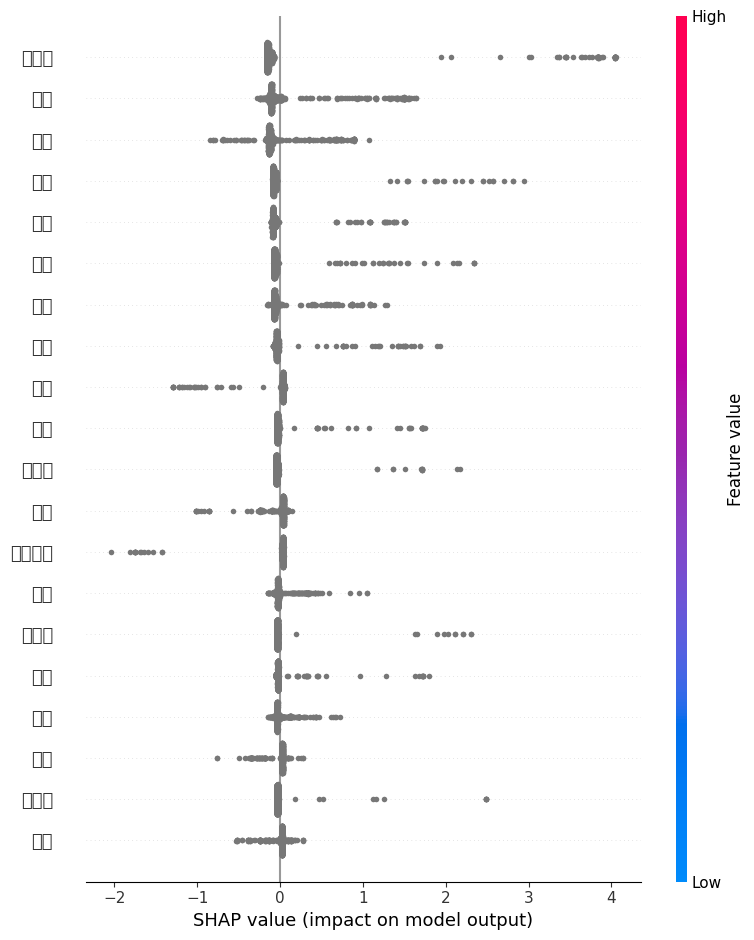

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=tfidf_vectorizer.get_feature_names_out())


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3515 (\N{SINHALA LETTER RAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Matplotlib currently does not support Sinhala natively.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3504 (\N{SINHALA LETTER MAHAAPRAANA DAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3490 (\N{SINHALA LETTER ALPAPRAANA JAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3514 (\N{SINHALA LETTER YAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3520 (\N{SINHALA LETTER VAYANNA}) missing from current 

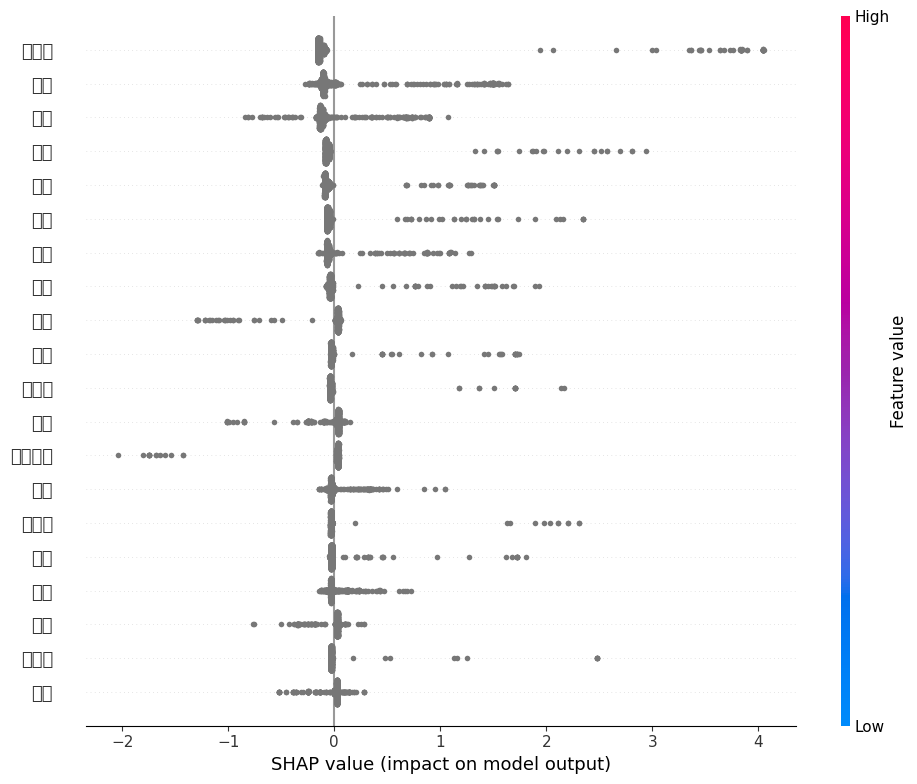

In [ ]:
import matplotlib.pyplot as plt
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=tfidf_vectorizer.get_feature_names_out(),
    plot_size=(10, 8),  # Adjust the plot size (width, height)
    max_display=20      # Limit the number of features displayed
)

plt.rcParams.update({'font.size': 12})  # Set a larger font size


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0, :], feature_names=tfidf_vectorizer.get_feature_names_out())


In [ ]:
# Download the font archive
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansSinhala-hinted.zip"

# Create a directory for fonts
!mkdir -p ~/.fonts

# Extract the ZIP archive
!unzip -o "NotoSansSinhala-hinted.zip" -d ~/.fonts/

# Update the font cache
!fc-cache -fv


--2024-12-13 19:07:40--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansSinhala-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.251.163.207, 142.251.167.207, 142.251.16.207, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.251.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9285540 (8.9M) [application/zip]
Saving to: ‘NotoSansSinhala-hinted.zip.3’

NotoSansSinhala-hin 100%[===================>]   8.85M  35.6MB/s    in 0.2s    

2024-12-13 19:07:40 (35.6 MB/s) - ‘NotoSansSinhala-hinted.zip.3’ saved [9285540/9285540]

Archive:  NotoSansSinhala-hinted.zip
  inflating: /root/.fonts/LICENSE_OFL.txt  
  inflating: /root/.fonts/NotoSansSinhala-Black.ttf  
  inflating: /root/.fonts/NotoSansSinhala-Bold.ttf  
  inflating: /root/.fonts/NotoSansSinhala-Condensed.ttf  
  inflating: /root/.fonts/NotoSansSinhala-CondensedBlack.ttf  
  inflating: /

In [ ]:
import matplotlib.font_manager as fm
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if "Sinhala" in font:
        print(font)


/root/.fonts/NotoSansSinhala-ExtraCondensedBold.ttf
/root/.fonts/NotoSansSinhalaUI-SemiCondensedMedium.ttf
/root/.fonts/NotoSansSinhala-CondensedLight.ttf
/root/.fonts/NotoSansSinhala-SemiCondensedExtraLight.ttf
/root/.fonts/NotoSansSinhala-CondensedBold.ttf
/root/.fonts/NotoSansSinhala-Thin.ttf
/root/.fonts/NotoSansSinhala-ExtraBold.ttf
/root/.fonts/NotoSansSinhala-CondensedThin.ttf
/root/.fonts/NotoSansSinhala-Medium.ttf
/root/.fonts/NotoSansSinhalaUI-ExtraCondensedBold.ttf
/root/.fonts/NotoSansSinhalaUI-SemiCondensedThin.ttf
/root/.fonts/NotoSansSinhala-ExtraCondensedLight.ttf
/root/.fonts/NotoSansSinhala-ExtraCondensedExtraLight.ttf
/root/.fonts/NotoSansSinhalaUI-ExtraCondensed.ttf
/root/.fonts/NotoSansSinhalaUI-SemiCondensedExtraBold.ttf
/root/.fonts/NotoSansSinhala-SemiBold.ttf
/root/.fonts/NotoSansSinhala-SemiCondensed.ttf
/root/.fonts/NotoSansSinhala-ExtraCondensedMedium.ttf
/root/.fonts/NotoSansSinhala-ExtraCondensedThin.ttf
/root/.fonts/NotoSansSinhalaUI-SemiCondensedBlack.tt

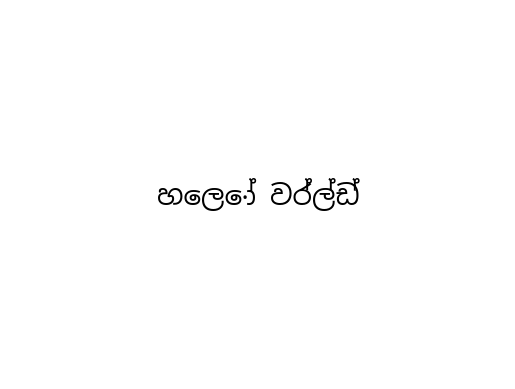

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

# Load font from its path
sinhala_font_path = '/root/.fonts/NotoSansSinhala-Regular.ttf'
sinhala_font = FontProperties(fname=sinhala_font_path)

# Example plot
plt.text(0.5, 0.5, 'හෙලෝ වර්ල්ඩ්', fontsize=20, fontproperties=sinhala_font, ha='center', va='center')
plt.axis('off')
plt.show()



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3521 (\N{SINHALA LETTER TAALUJA SAYANNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3530 (\N{SINHALA SIGN AL-LAKUNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3515 (\N{SINHALA LETTER RAYANNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3539 (\N{SINHALA VOWEL SIGN DIGA IS-PILLA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.

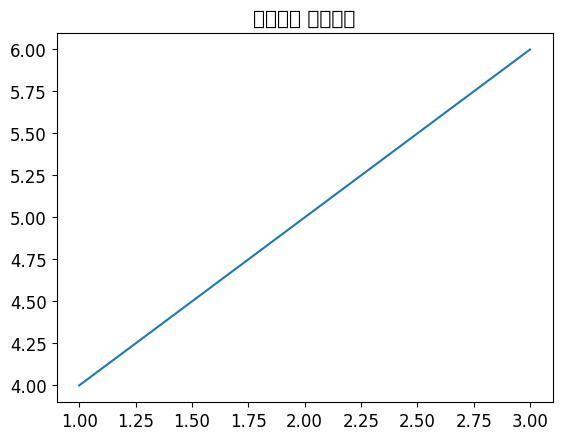

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Use Sinhala-compatible font
rcParams['font.family'] = 'Noto Sans Sinhala'

# Test plot
plt.title("ශ්‍රී ලංකා")  # Sinhala example
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3515 (\N{SINHALA LETTER RAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Matplotlib currently does not support Sinhala natively.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3504 (\N{SINHALA LETTER MAHAAPRAANA DAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3490 (\N{SINHALA LETTER ALPAPRAANA JAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3514 (\N{SINHALA LETTER YAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3520 (\N{SINHALA LETTER VAYANNA}) missing from current 

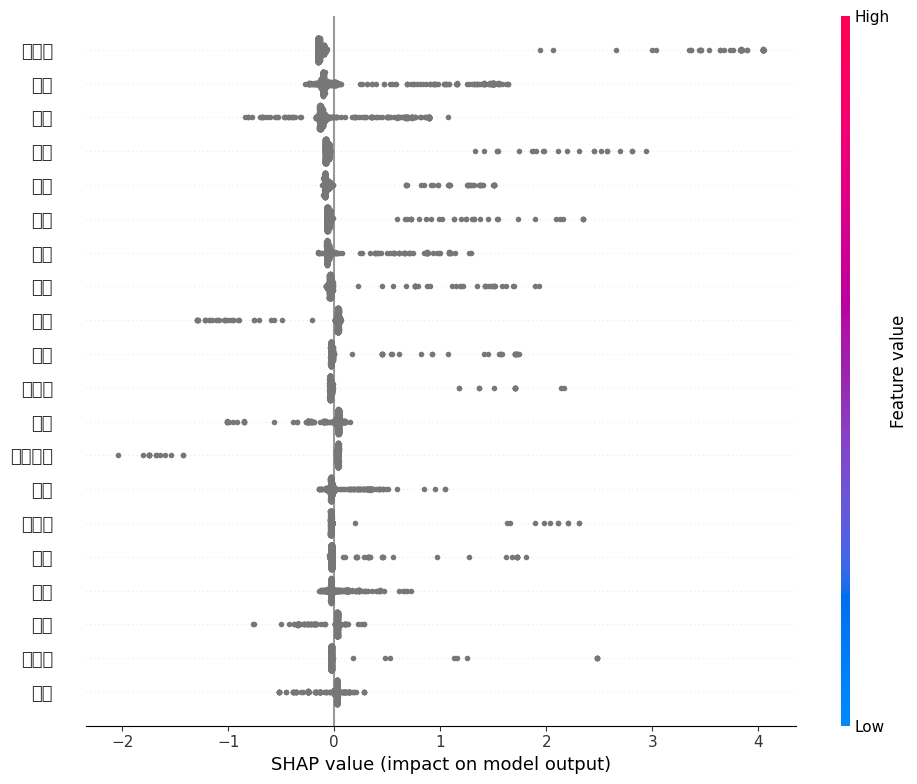

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# fetch the name of font that was installed
path = '/usr/share/fonts/truetype/NotoSansSinhala-Medium.ttf'
fontprop = fm.FontProperties(fname=path)

shap.summary_plot(
    shap_values,
    X_test,
    feature_names=tfidf_vectorizer.get_feature_names_out(),
    plot_size=(10, 8),
    max_display=20
)

In [ ]:
from matplotlib import rcParams, font_manager as fm

# Load Sinhala font
sinhala_font_path = '/root/.fonts/NotoSansSinhala-Regular.ttf'
sinhala_font = fm.FontProperties(fname=sinhala_font_path)

# Set it globally
rcParams['font.family'] = sinhala_font.get_name()


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3515 (\N{SINHALA LETTER RAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Matplotlib currently does not support Sinhala natively.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3504 (\N{SINHALA LETTER MAHAAPRAANA DAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3490 (\N{SINHALA LETTER ALPAPRAANA JAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3514 (\N{SINHALA LETTER YAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3520 (\N{SINHALA LETTER VAYANNA}) missing from current 

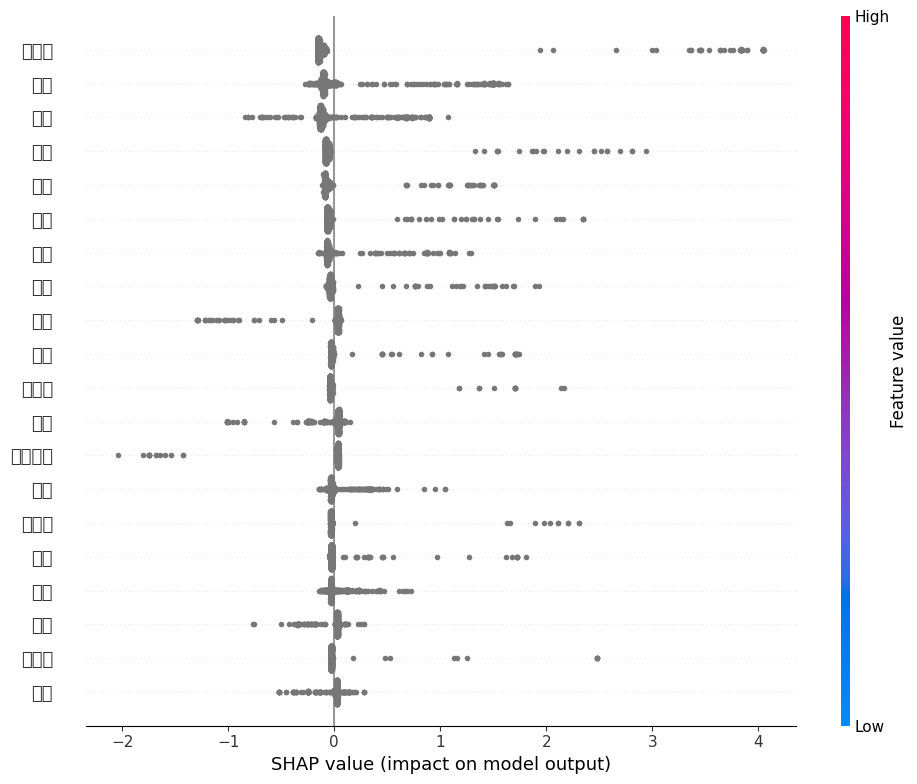

In [ ]:
import shap
import matplotlib.pyplot as plt

shap.summary_plot(
    shap_values,
    X_test,
    feature_names=tfidf_vectorizer.get_feature_names_out(),
    plot_size=(10, 8),  # Adjust the plot size (width, height)
    max_display=20      # Limit the number of features displayed
)
plt.show()


In [ ]:
from matplotlib import font_manager as fm

sinhala_font_path = '/root/.fonts/NotoSansSinhala-Regular.ttf'
sinhala_font = fm.FontProperties(fname=sinhala_font_path)
print(sinhala_font.get_name())


Noto Sans Sinhala


In [ ]:
from matplotlib import rcParams, font_manager as fm

# Set Sinhala font globally
rcParams['font.family'] = sinhala_font.get_name()



/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3515 (\N{SINHALA LETTER RAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Matplotlib currently does not support Sinhala natively.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3504 (\N{SINHALA LETTER MAHAAPRAANA DAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3490 (\N{SINHALA LETTER ALPAPRAANA JAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3514 (\N{SINHALA LETTER YAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3520 (\N{SINHALA LETTER VAYANNA}) missing from current 

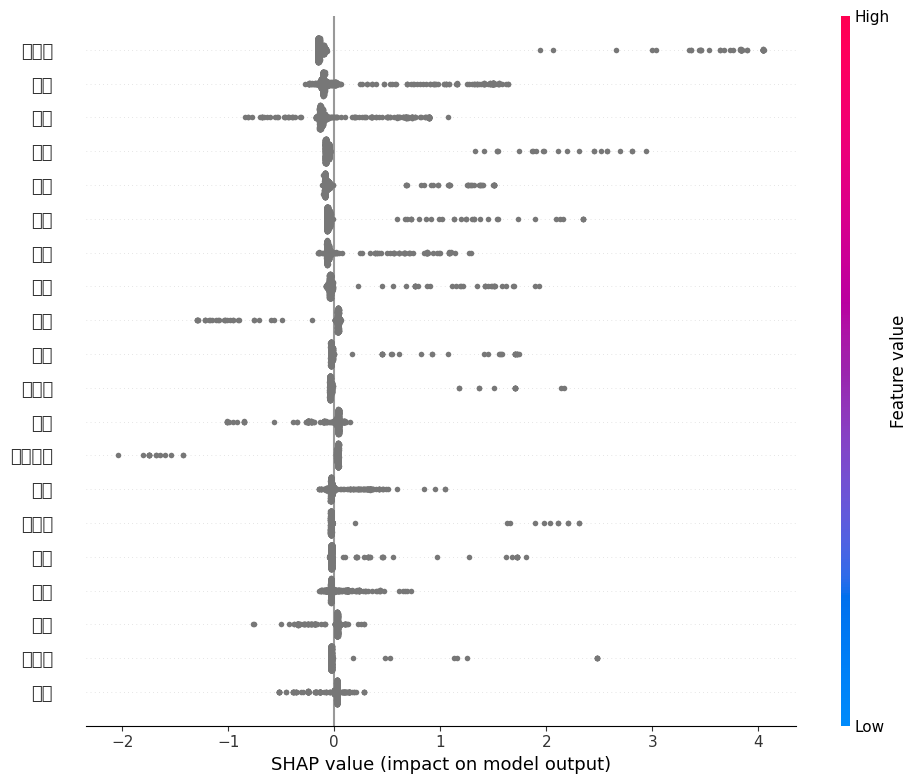

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=tfidf_vectorizer.get_feature_names_out(),
    plot_size=(10, 8),
    max_display=20
)
plt.gcf()  # Get the current matplotlib figure


In [ ]:
fig = plt.gcf()
for text in fig.findobj(match=lambda obj: isinstance(obj, plt.Text)):
    text.set_fontproperties(sinhala_font)
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use the Anti-Grain Geometry backend


In [ ]:
from matplotlib import rcParams, font_manager as fm

# Set global Sinhala font
sinhala_font_path = '/root/.fonts/NotoSansSinhala-Regular.ttf'
sinhala_font = fm.FontProperties(fname=sinhala_font_path)
rcParams['font.family'] = sinhala_font.get_name()


In [ ]:
import shap
import matplotlib.pyplot as plt

# Generate SHAP summary plot
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=tfidf_vectorizer.get_feature_names_out(),
    plot_size=(10, 8),
    max_display=20
)

# Update text elements to use Sinhala font
fig = plt.gcf()
for ax in fig.axes:
    for text in ax.texts:
        text.set_fontproperties(sinhala_font)

plt.show()


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3515 (\N{SINHALA LETTER RAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Matplotlib currently does not support Sinhala natively.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3504 (\N{SINHALA LETTER MAHAAPRAANA DAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3490 (\N{SINHALA LETTER ALPAPRAANA JAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3514 (\N{SINHALA LETTER YAYANNA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3520 (\N{SINHALA LETTER VAYANNA}) missing from current 

# Label the dataset using best model random forest

In [ ]:
model = joblib.load('random_forest2.pkl')

In [ ]:
df_new = pd.read_csv('sinhala_df_annotated.csv')

In [ ]:
df_new.shape

(12742, 11)

In [ ]:
df.shape

(1739, 4)

In [ ]:
df_to_label = df_new.iloc[1740:].reset_index(drop=True)

In [ ]:
df_to_label.head()

,comment_id,video_id,video_title,text,timestamp,author,author_email,reply_to,Label,Domain,About
0,Ugx36A8or4ALpQIV7_54AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,මුන් තනිකර කොට්,2019-11-16T23:08:21Z,@pathmakumarikapugedara6021,UCoZEcAycvXwfmx013tewd-A,NaN,NaN,NaN,NaN
1,UgyxLTwneMnp0Nsbdcd4AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,සජිත් හොඳ වන්නියට තමා හොඳ බත් කන සිංහලයා ද...,2019-11-16T21:48:18Z,@accesstelecom1961,UCIgWOPrr9u1WUIEPP8Czj1g,NaN,NaN,NaN,NaN
2,UgwrjPAIzTNDQo290bR4AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,300ක් මරපු උන්ට අපි කතිරෙ ගැහුවෙ නෑ..,2019-11-16T21:43:01Z,@viraj5042,UCwSLUWdJGABpCXOejcD4qTQ,NaN,NaN,NaN,NaN
3,UgztCqp40JCJh0saik14AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,එකමුතුවක් නැති සිංහල ජාතිය,2019-11-16T21:42:04Z,@deepikad7734,UC1VTg6JuGd0CkBPFfjfrerg,NaN,NaN,NaN,NaN
4,UgzFY1nF-dHzTl0_tlV4AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,නොදකින් කොහොමත් වන්නියේ ඉන්නේ හරක්,2019-11-16T21:41:21Z,@deepikad7734,UC1VTg6JuGd0CkBPFfjfrerg,NaN,NaN,NaN,NaN


In [ ]:
df_to_label['Combined'] = df_to_label['video_title'] + '.' + df_to_label['text']

In [ ]:
df_to_label.head()

,comment_id,video_id,video_title,text,timestamp,author,author_email,reply_to,Label,Domain,About,Combined
0,Ugx36A8or4ALpQIV7_54AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,මුන් තනිකර කොට්,2019-11-16T23:08:21Z,@pathmakumarikapugedara6021,UCoZEcAycvXwfmx013tewd-A,NaN,NaN,NaN,NaN,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...
1,UgyxLTwneMnp0Nsbdcd4AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,සජිත් හොඳ වන්නියට තමා හොඳ බත් කන සිංහලයා ද...,2019-11-16T21:48:18Z,@accesstelecom1961,UCIgWOPrr9u1WUIEPP8Czj1g,NaN,NaN,NaN,NaN,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...
2,UgwrjPAIzTNDQo290bR4AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,300ක් මරපු උන්ට අපි කතිරෙ ගැහුවෙ නෑ..,2019-11-16T21:43:01Z,@viraj5042,UCwSLUWdJGABpCXOejcD4qTQ,NaN,NaN,NaN,NaN,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...
3,UgztCqp40JCJh0saik14AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,එකමුතුවක් නැති සිංහල ජාතිය,2019-11-16T21:42:04Z,@deepikad7734,UC1VTg6JuGd0CkBPFfjfrerg,NaN,NaN,NaN,NaN,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...
4,UgzFY1nF-dHzTl0_tlV4AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,නොදකින් කොහොමත් වන්නියේ ඉන්නේ හරක්,2019-11-16T21:41:21Z,@deepikad7734,UC1VTg6JuGd0CkBPFfjfrerg,NaN,NaN,NaN,NaN,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...


In [ ]:
def remove_emoji(text):
    if isinstance(text, str):  # Check if text is a string
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

df_to_label['Combined'] = df_to_label['Combined'].apply(remove_emoji)


In [ ]:
def remove_urls(text):
  if isinstance(text, str):  # Check if text is a string
    return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
  else:
    return text
# Apply the function to the text column
df_to_label['Combined'] = df_to_label['Combined'].apply(remove_urls)

In [ ]:
def clean_data(text):
    if isinstance(text, str): # Check if text is a string
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) # Remove URLs

        text = re.sub(r'<.*?>', '', text)     # Remove HTML tags

        text = re.sub(r'@\\w+', '', text)  # Remove mentions

        text = re.sub(r'[^\u0D80-\u0DFF\s]', ' ', text) # Remove non-Sinhala characters (punctuation, numbers, etc.)
        return text
    else:
        return ''

df_to_label['Combined'] = df_to_label['Combined'].apply(clean_data)

In [ ]:
X = df_to_label['Combined']

tfidf_vectorizer = TfidfVectorizer(max_features=1438)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
predictions = model.predict(X_tfidf)

# label_encoder = joblib.load('label_encoder.pkl')  # Replace with the filename if encoder was saved
decoded_predictions = label_encoder.inverse_transform(predictions)

# Add predictions to the DataFrame
df_to_label['Domain'] = decoded_predictions

# Save or display the results
df_to_label.to_csv('Domain_predicted.csv', index=False)

In [ ]:
df_to_label.head()

,comment_id,video_id,video_title,text,timestamp,author,author_email,reply_to,Label,Domain,About,Combined
0,Ugx36A8or4ALpQIV7_54AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,මුන් තනිකර කොට්,2019-11-16T23:08:21Z,@pathmakumarikapugedara6021,UCoZEcAycvXwfmx013tewd-A,NaN,NaN,Political,NaN,ජනාධිපතිවරණය වන්නි දිස්ත් රික්කය තැපැ...
1,UgyxLTwneMnp0Nsbdcd4AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,සජිත් හොඳ වන්නියට තමා හොඳ බත් කන සිංහලයා ද...,2019-11-16T21:48:18Z,@accesstelecom1961,UCIgWOPrr9u1WUIEPP8Czj1g,NaN,NaN,Non political,NaN,ජනාධිපතිවරණය වන්නි දිස්ත් රික්කය තැපැ...
2,UgwrjPAIzTNDQo290bR4AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,300ක් මරපු උන්ට අපි කතිරෙ ගැහුවෙ නෑ..,2019-11-16T21:43:01Z,@viraj5042,UCwSLUWdJGABpCXOejcD4qTQ,NaN,NaN,Political,NaN,ජනාධිපතිවරණය වන්නි දිස්ත් රික්කය තැපැ...
3,UgztCqp40JCJh0saik14AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,එකමුතුවක් නැති සිංහල ජාතිය,2019-11-16T21:42:04Z,@deepikad7734,UC1VTg6JuGd0CkBPFfjfrerg,NaN,NaN,Political,NaN,ජනාධිපතිවරණය වන්නි දිස්ත් රික්කය තැපැ...
4,UgzFY1nF-dHzTl0_tlV4AaABAg,phaeE9W8Vgs,ජනාධිපතිවරණය 2019 : වන්නි දිස්ත්‍රික්කය - තැපැ...,නොදකින් කොහොමත් වන්නියේ ඉන්නේ හරක්,2019-11-16T21:41:21Z,@deepikad7734,UC1VTg6JuGd0CkBPFfjfrerg,NaN,NaN,Non political,NaN,ජනාධිපතිවරණය වන්නි දිස්ත් රික්කය තැපැ...
